# Sequence Models & Attention mechanism

# Various sequence to sequence architectures

## Basic Models

## Sequence to sequence model

French to English translation
- Jane visite l'Afrique en septembre

-> Jane is visiting Africa in September.

[Sutskever et al., 2014](https://arxiv.org/abs/1409.3215)
[Cho et al., 2014.](https://arxiv.org/abs/1406.1078)

### Image captioning
Recognize an object throught network, and generate sentences.

[Mao et al., 2014](https://arxiv.org/abs/1412.6632)
[Vinyals et al., 2014](https://arxiv.org/abs/1411.4555)
[Karpathy and Fei Fei, 2015](https://cs.stanford.edu/people/karpathy/cvpr2015.pdf)

## Picking the most likely sentence
Machine translation as building a conditional language model
- Language model:
    - generate sentences
- Machine translation:
    - 
### Finding the most likely translation
 - Jane visite l'Afrique en setembre.
 - In september, Jane will visit Africa.
 - Her African friend welcomed Jane in September.
beam search is used.

### Why not a greedy search?
just picking up the best from selections?

picking one by one greedy approach gives you less optimal results.

## Beam Search
- Step 1 stores $P(y^{<1>}|x)$ for n samples (n: beam width)
- Step 2 stores $P(y^{<2>}, y^{<1>}|x)$ = $P(y^{<2>}|x, y^{<1>}) P(y^{<1>}|x)$
- repeat steps until <EOS>

## Refinement to Beam search

### Length normmalization
- Original
    - $ argmax_y \prod_{t=1}^{T_y} P(y^{<t>}| x, y^{<1>}, y^{<2>}, \dots, y^{<t>})$
- refined version
    - $ argmax_y \sum_{t=1}^{T_y} \log P(y^{<t>}| x, y^{<1>}, y^{<2>}, \dots, y^{<t>})$
- further refined version
    - $ argmax_y \frac{1}{T_y^{\alpha}} \sum_{t=1}^{T_y} \log P(y^{<t>}| x, y^{<1>}, y^{<2>}, \dots, y^{<t>})$

### Beam search discussion
    -Beam width B?
        - large B, better results, slower
        - small B, less results, faster
        
Beam Search runs faster but is not guaranteed to find optimal solution.

## Error analysis in beam search
- jane visite l'Afrique en septembre.
- Human: Jane visits Africa in September. ($y*$)
- Algorithm: Jane visited Africa last Septmber ($\hat{y}$).

By comparing human sentences and generated algorithms,
Figures out what faction of errors are 'the reason' beam search vs. RNN model.

## Bleu Score
How can we evaluate accuracy of translated language?

### Evaluating machine translation?
- French: Le chat est sur le tapis?
- Reference 1: The cat is on the mat.
- Reference 2: There is a cat on the mat.
[Papineni et al., 2002](https://www.aclweb.org/anthology/P02-1040.pdf)

### Blue score on bigrams
### Bleu details
- $p_n$ = Blue score on n-grams only
- Combined Bleu score: $B$
- BP (Bleu penalty) 
    - = 1 if MT_output_length > reference_output_length
    - = exp(1- MT_output_length/reference_output_length) otherwise

## Attentional model
## the problem of long sentences
Accuracy of Blue score decreases when you have longer sentences.
[Bahdanau et al., 2014.](https://arxiv.org/abs/1409.0473)

# Speech recognition  - Audio data
## Speech recognition problem

## CTC cost for speech recognition
(CTC: connectionist temporal classification)
[Graves et al., 2006](ftp://ftp.idsia.ch/pub/juergen/icml2006.pdf)

## Trigger Word Detection

# Quiz: Sequence models & Attention mechanism

In [3]:
from IPython.display import Image

## 1. Consider using this encoder-decoder model for machine translation.

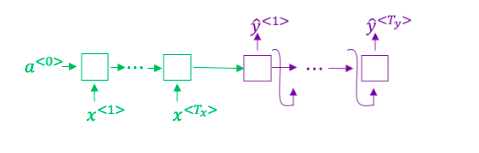

In [6]:
Image('images/SequenceModel_week3_fig1.png')

This model is a “conditional language model” in the sense that the encoder portion (shown in green) is modeling the probability of the input sentence x.
### Answer: False

## 2. In beam search, if you increase the beam width B, which of the following would you expect to be true? Check all that apply.
- Beam search will run more slowly.
- Beam search will use up more memory.
- Beam search will generally find better solutions (i.e. do a better job maximizing P(y∣x))
- Beam search will converge after fewer steps.
### Answers:
- Beam search will run more slowly.
- Beam search will use up more memory.
- Beam search will generally find better solutions (i.e. do a better job maximizing P(y∣x))

## 3. In machine translation, if we carry out beam search without using sentence normalization, the algorithm will tend to output overly short translations.
### Answer: True.

## 4. Suppose you are building a speech recognition system, which uses an RNN model to map from audio clip x to a text transcript y. Your algorithm uses beam search to try to find the value of y that maximizes P(y∣x). On a dev set example, given an input audio clip, your algorithm outputs the transcript y^= “I’m building an A Eye system in Silly con Valley.”, whereas a human gives a much superior transcript y∗= “I’m building an AI system in Silicon Valley.”
According to your model,

P(y^∣x)=1.09∗10−7
P(y∗∣x)=7.21∗10−8

Would you expect increasing the beam width B to help correct this example?

- No, because P(y∗∣x)≤P(y^∣x) indicates the error should be attributed to the RNN rather than to the search algorithm.
- No, because P(y∗∣x)≤P(y^∣x) indicates the error should be attributed to the search algorithm rather than to the RNN.
- Yes, because P(y∗∣x)≤P(y^∣x) indicates the error should be attributed to the RNN rather than to the search algorithm.
- Yes, because P(y∗∣x)≤P(y^∣x) indicates the error should be attributed to the search algorithm rather than to the RNN.

### Answer:
- No, because P(y∗∣x)≤P(y^∣x) indicates the error should be attributed to the RNN rather than to the search algorithm.

## Q5. Continuing the example from Q4, suppose you work on your algorithm for a few more weeks, and now find that for the vast majority of examples on which your algorithm makes a mistake, P(y∗∣x)>P(y^∣x). This suggest you should focus your attention on improving the search algorithm.
### Answer: True.

## Q6. Consider the attention model for machine translation.

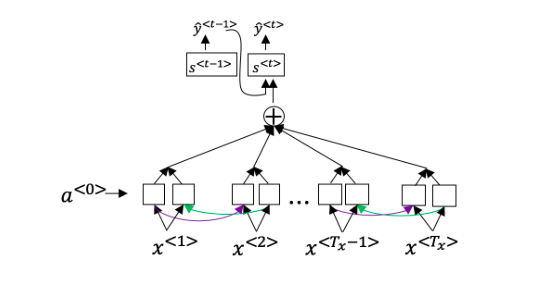

In [8]:
Image('images/SequenceModel_week3_fig2.png')

Further, here is the formula for α<t,t′>.

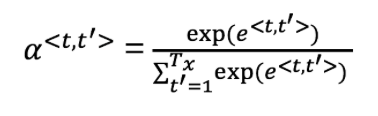

In [9]:
Image('images/SequenceModel_week3_fig3.png')

Which of the following statements about α<t,t′> are true? Check all that apply.
- We expect α<t,t′> to be generally larger for values of a<t′> that are highly relevant to the value the network should output for y<t>. (Note the indices in the superscripts.)
- We expect α<t,t′> to be generally larger for values of a<t> that are highly relevant to the value the network should output for y<t′>. (Note the indices in the superscripts.)
- ∑tα<t,t′>=1 (Note the summation is over t.)
- ∑t′α<t,t′>=1 (Note the summation is over t′.)

### Answer: 
- We expect α<t,t′> to be generally larger for values of a<t′> that are highly relevant to the value the network should output for y<t>. (Note the indices in the superscripts.)
- ∑t′α<t,t′>=1 (Note the summation is over t′.)

## Q7. The network learns where to “pay attention” by learning the values e<t,t′>, which are computed using a small neural network: We can't replace s<t−1> with s<t> as an input to this neural network. This is because s<t> depends on α<t,t′> which in turn depends on e<t,t′>; so at the time we need to evalute this network, we haven’t computed s<t> yet.
### Answer: True

## Q8. Compared to the encoder-decoder model shown in Question 1 of this quiz (which does not use an attention mechanism), we expect the attention model to have the greatest advantage when:
### Answer: The input sequence length Tx is large.

## Q9. Under the CTC model, identical repeated characters not separated by the “blank” character (_) are collapsed. Under the CTC model, what does the following string collapse to?

__c_oo_o_kk___b_ooooo__oo__kkk

- cokbok
- cookbook
- cook book
- coookkboooooookkk
### Answer: 
- cookbook

## Q10.  In trigger word detection, x<t> is: 
- Features of the audio (such as spectrogram features) at time t.
- The t-th input word, represented as either a one-hot vector or a word embedding.
- Whether the trigger word is being said at time t.
- Whether someone has just finished saying the trigger word at time t.
### Answer(correct): Features of the audio (such as spectrogram features) at time t.